# Analysis from Brian Goggin (uses newly-produced data as of September 2017)

In [5]:
import pandas as pd
import logging
import dateutil
from dateutil import parser
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [6]:
#import dataset of project times from "data" folder
file = "../../../data/cleaned/all_quarters__one_record_per_project.csv"
df = pd.read_csv(file)

In [7]:
#First, filter out those projects that are exclusively non-residential (defined as those without units)
df = df[df['units'] > 0]

In [8]:
#Next, keep only those that reached completion at some point over the time period
df=df[pd.notnull(df['comp_date'])]

In [3]:
df.head()

,Unnamed: 0,BP_date,address,apn,best_date,best_stat,comp_date,con_date,dbi_permit,first_date,first_project_record_date,firstfiled,latest_project_record_date,latest_project_status,project_dates,project_duration_days,project_statuses,report_quarter,report_year,status,units,unitsnet,x,y
0,15756,NaN,972 RUTLAND ST,6304014,2015-03-02,BP FILED,NaN,NaN,201503029757.0,2015-03-02,2015-03-02,2015-03-02,2015-03-02,BP FILED,"('2015-03-02', '2015-03-02', '2015-03-02', '20...",NaN,"('BP FILED', 'BP FILED', 'BP FILED', 'BP FILED...",1,2016,Proposed,2.0,1.0,37.710366,-122.408721
1,8574,NaN,350 LINDEN ST,0817069,2014-01-17,CONSTRUCTION,10/01/2014,2013-07-12,200710185839,2007-10-18,2013-07-12,2007-10-18,2014-01-17,CONSTRUCTION,"('2013-07-12', '2013-07-12', '2014-01-17', '20...",2540.0,"('CONSTRUCTION', 'CONSTRUCTION', 'CONSTRUCTION...",3,2014,Under Construction,6.0,6.0,37.776427,-122.423498
2,14750,NaN,1441 - 1443 OCEAN AV,6941059,2015-12-23,PL APPROVED,NaN,NaN,NaN,2015-10-29,2015-12-23,2015-10-29,2015-12-23,PL APPROVED,"('2015-12-23',)",NaN,"('PL APPROVED',)",1,2016,Proposed,0.0,0.0,37.723999,-122.457940
3,5396,NaN,1844 MARKET ST,0871016,2013-08-26,CONSTRUCTION,10/01/2013,2007-07-17,200607146588,2005-06-01 07:00:00,2007-07-17,2005-06-01,2013-08-26,CONSTRUCTION,"('2007-07-17', '2007-07-17', '2007-07-17', '20...",3043.0,"('CONSTRUCTION', 'CONSTRUCTION', 'CONSTRUCTION...",3,2013,Under Construction,113.0,113.0,37.771461,-122.424688
4,7405,2013-06-18,2401 16TH ST,3965001,2014-06-30,CONSTRUCTION,07/01/2014,2013-12-10,201208248160,2008-10-09 07:00:00,2011-04-21,2008-10-09,2014-06-30,CONSTRUCTION,"('2011-04-21', '2011-04-21', '2012-08-24', '20...",2090.0,"('PL APPROVED', 'PL APPROVED', 'BP FILED', 'BP...",2,2014,Under Construction,12.0,12.0,37.765523,-122.410614


In [9]:
#convert completion date to date variables type
df['project_duration_days'].describe()

count     613.000000
mean     1751.290375
std      1194.313905
min       -20.000000
25%       827.000000
50%      1402.000000
75%      2518.000000
max      8806.000000
Name: project_duration_days, dtype: float64

In [14]:
df['project_time_years']=df['project_duration_days']/365

In [16]:
df['project_time_years'].describe()

count    613.000000
mean       4.798056
std        3.272093
min       -0.054795
25%        2.265753
50%        3.841096
75%        6.898630
max       24.126027
Name: project_time_years, dtype: float64

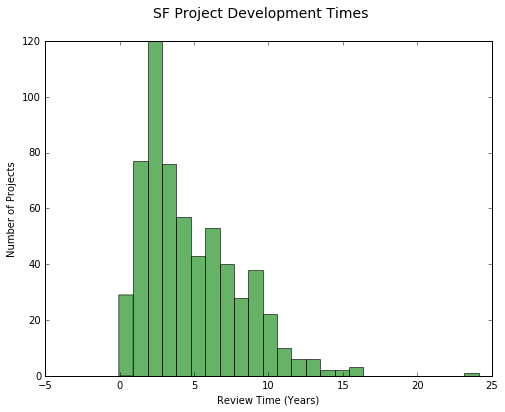

In [15]:
plt.figure(1, figsize=(8,6), )
plt.suptitle('SF Housing Development Times', fontsize=14)
plt.xlabel('Review Time (Years)')
plt.ylabel('Number of Projects')
ax = plt.hist(df['project_time_years'], bins=25, alpha=.6, color='g')
plt.show()

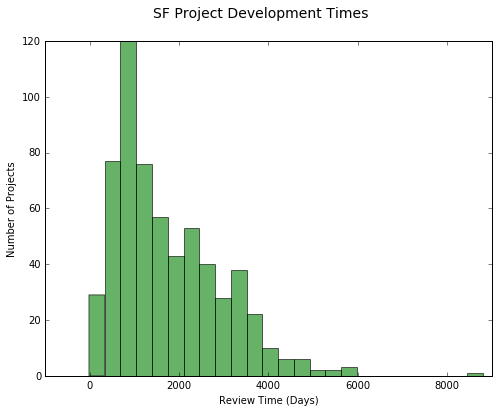

In [13]:
plt.figure(1, figsize=(8,6), )
plt.suptitle('SF Housing Development Times', fontsize=14)
plt.xlabel('Review Time (Days)')
plt.ylabel('Number of Projects')
ax = plt.hist(df['project_duration_days'], bins=25, alpha=.6, color='g')
plt.show()

In [ ]:
#Create dataset of net units added with 
list = []
uniqueid = 0
for index, row in df.iterrows():
    amount = int(row['unitsnet'])
    for units in range(0, amount):
        dictionary = {}
        dictionary['id']=uniqueid+1
        dictionary['time']=row['project_time_years']
        list.append(dictionary)
        uniqueid=uniqueid+1
df_units = pd.DataFrame(list)

plt.figure(1, figsize=(8,6), )
plt.suptitle('SF Housing Development Times', fontsize=14)
plt.xlabel('Review Time (Years)')
plt.ylabel('Number of Units Added')
ax = plt.hist(df_units['time'], bins=25, alpha=.6, color='g')
plt.show()

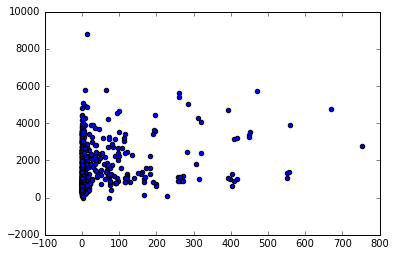

In [11]:
plt.scatter(df['unitsnet'], df['project_duration_days'])

In [48]:
# Top 5 longest projects
df.sort_values('project_time_years', ascending = False)[0:5]

,Unnamed: 0,BP_date,address,apn,best_date,best_stat,comp_date,con_date,dbi_permit,first_date,first_project_record_date,firstfiled,latest_project_record_date,latest_project_status,project_dates,project_duration_days,project_statuses,report_quarter,report_year,status,units,unitsnet,x,y,project_time_years
1827,10558,NaN,833-881 JAMESTOWN,4991277,2007-09-17,CONSTRUCTION,04/01/2015,2007-09-17,9924080S,1991-02-19 08:00:00,2007-09-17,1991-02-19,2007-09-17,CONSTRUCTION,"('2007-09-17', '2007-09-17', '2007-09-17', '20...",8806.0,"('CONSTRUCTION', 'CONSTRUCTION', 'CONSTRUCTION...",1,2015,Under Construction,132.0,14.0,37.717174,-122.392222,24.126027
190,9245,2009-11-03,1179 TENNESSEE ST,4172053,2014-12-18,CONSTRUCTION,01/01/2015,2014-03-21,9902819,1999-02-11 08:00:00,2009-11-03,2001-04-26,2014-12-18,CONSTRUCTION,"('2009-11-03', '2009-11-03', '2009-11-03', '20...",5802.0,"('BP REINSTATED', 'BP REINSTATED', 'BP REINSTA...",4,2014,Under Construction,8.0,8.0,37.755993,-122.389058,15.895890
1346,14734,NaN,1400 07TH ST,3833001,2016-03-03,CONSTRUCTION,04/01/2016,2016-03-03,201112070227.0,2000-05-18,2016-03-03,2000-05-18,2016-03-03,CONSTRUCTION,"('2016-03-03',)",5797.0,"('CONSTRUCTION',)",1,2016,Under Construction,65.0,65.0,37.767108,-122.396595,15.882192
258,13261,2012-09-07,1000 16TH ST,3833001,2015-12-24,CONSTRUCTION,01/01/2016,2012-09-07,201112070227.0,2000-05-18,2012-07-13,2000-05-18,2015-12-24,CONSTRUCTION,"('2012-07-13', '2012-07-13', '2012-07-13', '20...",5706.0,"('PL APPROVED', 'PL APPROVED', 'PL APPROVED', ...",4,2015,Under Construction,470.0,470.0,37.767108,-122.396595,15.632877
470,14896,NaN,1634 - 1690 PINE ST,0647007,2016-03-29,CONSTRUCTION,04/01/2016,2016-01-14,201312184508.0,2000-11-27,2016-01-14,2000-11-27,2016-03-29,CONSTRUCTION,"('2016-01-14', '2016-03-29')",5604.0,"('CONSTRUCTION', 'CONSTRUCTION')",1,2016,Under Construction,260.0,260.0,37.789593,-122.422951,15.353425


In [17]:
df.head()

,Unnamed: 0,BP_date,address,apn,best_date,best_stat,comp_date,con_date,dbi_permit,first_date,first_project_record_date,firstfiled,latest_project_record_date,latest_project_status,project_dates,project_duration_days,project_statuses,report_quarter,report_year,status,units,unitsnet,x,y,project_time_years
1,8574,NaN,350 LINDEN ST,0817069,2014-01-17,CONSTRUCTION,10/01/2014,2013-07-12,200710185839,2007-10-18,2013-07-12,2007-10-18,2014-01-17,CONSTRUCTION,"('2013-07-12', '2013-07-12', '2014-01-17', '20...",2540.0,"('CONSTRUCTION', 'CONSTRUCTION', 'CONSTRUCTION...",3,2014,Under Construction,6.0,6.0,37.776427,-122.423498,6.958904
3,5396,NaN,1844 MARKET ST,0871016,2013-08-26,CONSTRUCTION,10/01/2013,2007-07-17,200607146588,2005-06-01 07:00:00,2007-07-17,2005-06-01,2013-08-26,CONSTRUCTION,"('2007-07-17', '2007-07-17', '2007-07-17', '20...",3043.0,"('CONSTRUCTION', 'CONSTRUCTION', 'CONSTRUCTION...",3,2013,Under Construction,113.0,113.0,37.771461,-122.424688,8.336986
4,7405,2013-06-18,2401 16TH ST,3965001,2014-06-30,CONSTRUCTION,07/01/2014,2013-12-10,201208248160,2008-10-09 07:00:00,2011-04-21,2008-10-09,2014-06-30,CONSTRUCTION,"('2011-04-21', '2011-04-21', '2012-08-24', '20...",2090.0,"('PL APPROVED', 'PL APPROVED', 'BP FILED', 'BP...",2,2014,Under Construction,12.0,12.0,37.765523,-122.410614,5.726027
7,13704,2012-09-24,551 22ND AV,1565006A,2016-01-11,CONSTRUCTION,01/01/2016,2014-05-22,201012025978.0,2010-12-02,2010-12-02,2010-12-02,2016-01-11,CONSTRUCTION,"('2010-12-02', '2010-12-02', '2012-09-24', '20...",1856.0,"('BP FILED', 'BP FILED', 'BP APPROVED', 'BP AP...",4,2015,Under Construction,2.0,2.0,37.777328,-122.481640,5.084932
12,13540,2012-11-26,200 COLEMAN ST,4591C098,2016-01-07,CONSTRUCTION,01/01/2016,2014-06-23,200912223674.0,2009-12-22,2012-11-26,2009-12-22,2016-01-07,CONSTRUCTION,"('2012-11-26', '2012-11-26', '2012-11-26', '20...",2201.0,"('BP ISSUED', 'BP ISSUED', 'BP ISSUED', 'CONST...",4,2015,Under Construction,12.0,12.0,37.727648,-122.368909,6.030137


In [33]:
df['unitsnet'].sum()

24772.0